<a href="https://colab.research.google.com/github/monalip13/lenet/blob/main/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Downloading data
 (train_data, _), (test_data, _) =  tf.keras.datasets.mnist.load_data()
train_data = train_data/np.float32(255)
train_data = np.reshape(train_data, (train_data.shape[0], 784))


test_data = test_data/np.float32(255)
test_data = np.reshape(test_data, (test_data.shape[0], 784))

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#Class that defines the RBM's behavior
class RBM(object):

    def __init__(self, input_size, output_size, lr=1.0, batchsize=100):
        """
        m: Number of neurons in visible layer
        n: number of neurons in hidden layer
        """
        #Defining the hyperparameters
        self._input_size = input_size #Size of Visible
        self._output_size = output_size #Size of output
        self.learning_rate = lr #The step used in gradient descent
        self.batchsize = batchsize #The size of how much data will be used for training per sub iteration

        #Initializing weights and biases as matrices full of zeroes
        self.w = tf.zeros([input_size, output_size], np.float32) #Creates and initializes the weights with 0
        self.hb = tf.zeros([output_size], np.float32) #Creates and initializes the hidden biases with 0
        self.vb = tf.zeros([input_size], np.float32) #Creates and initializes the visible biases with 0


    #Define Forward Pass method
    def prob_h_given_v(self, visible, w, hb):
        #Sigmoid
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    #Define Backward Pass method
    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)

    #Generate the sample probability
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random.uniform(tf.shape(probs))))

    #Define Training method for the model
    def train(self, X, epochs=10):

        loss = []
        for epoch in range(epochs):
            #For each step/batch
            for start, end in zip(range(0, len(X), self.batchsize),range(self.batchsize,len(X), self.batchsize)):
                batch = X[start:end]

                #Initialize with sample probabilities

                h0 = self.sample_prob(self.prob_h_given_v(batch, self.w, self.hb))
                v1 = self.sample_prob(self.prob_v_given_h(h0, self.w, self.vb))
                h1 = self.prob_h_given_v(v1, self.w, self.hb)

                #Create the Gradients
                positive_grad = tf.matmul(tf.transpose(batch), h0)
                negative_grad = tf.matmul(tf.transpose(v1), h1)

                #Update learning rates
                self.w = self.w + self.learning_rate *(positive_grad - negative_grad) / tf.dtypes.cast(tf.shape(batch)[0],tf.float32)
                self.vb = self.vb +  self.learning_rate * tf.reduce_mean(batch - v1, 0)
                self.hb = self.hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)

            #Find the error rate
            err = tf.reduce_mean(tf.square(batch - v1))
            print ('Epoch: %d' % epoch,'reconstruction error: %f' % err)
            loss.append(err)

        return loss

    #Create expected output for our DBN
    def rbm_output(self, X):
        out = tf.nn.sigmoid(tf.matmul(X, self.w) + self.hb)
        return out

    def rbm_reconstruct(self,X):
        h = tf.nn.sigmoid(tf.matmul(X, self.w) + self.hb)
        reconstruct = tf.nn.sigmoid(tf.matmul(h, tf.transpose(self.w)) + self.vb)
        return reconstruct


In [7]:
#Size of inputs is the number of inputs in the training set
input_size = train_data.shape[1]
rbm = RBM(input_size, 200)

err = rbm.train(train_data,50)

Epoch: 0 reconstruction error: 0.057015
Epoch: 1 reconstruction error: 0.053842
Epoch: 2 reconstruction error: 0.050174
Epoch: 3 reconstruction error: 0.049697
Epoch: 4 reconstruction error: 0.047799
Epoch: 5 reconstruction error: 0.046898
Epoch: 6 reconstruction error: 0.045578
Epoch: 7 reconstruction error: 0.045277
Epoch: 8 reconstruction error: 0.044129
Epoch: 9 reconstruction error: 0.044456
Epoch: 10 reconstruction error: 0.044073
Epoch: 11 reconstruction error: 0.042993
Epoch: 12 reconstruction error: 0.043105
Epoch: 13 reconstruction error: 0.043629
Epoch: 14 reconstruction error: 0.043488
Epoch: 15 reconstruction error: 0.041917
Epoch: 16 reconstruction error: 0.043470
Epoch: 17 reconstruction error: 0.042498
Epoch: 18 reconstruction error: 0.042774
Epoch: 19 reconstruction error: 0.042191
Epoch: 20 reconstruction error: 0.040444
Epoch: 21 reconstruction error: 0.042825
Epoch: 22 reconstruction error: 0.042026
Epoch: 23 reconstruction error: 0.042883
Epoch: 24 reconstruction e

Text(0, 0.5, 'cost')

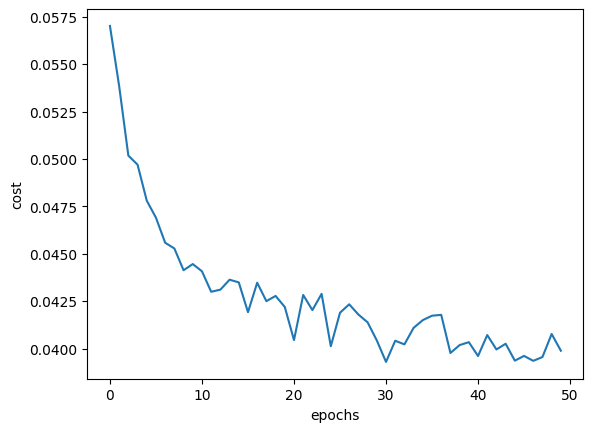

In [8]:
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('cost')

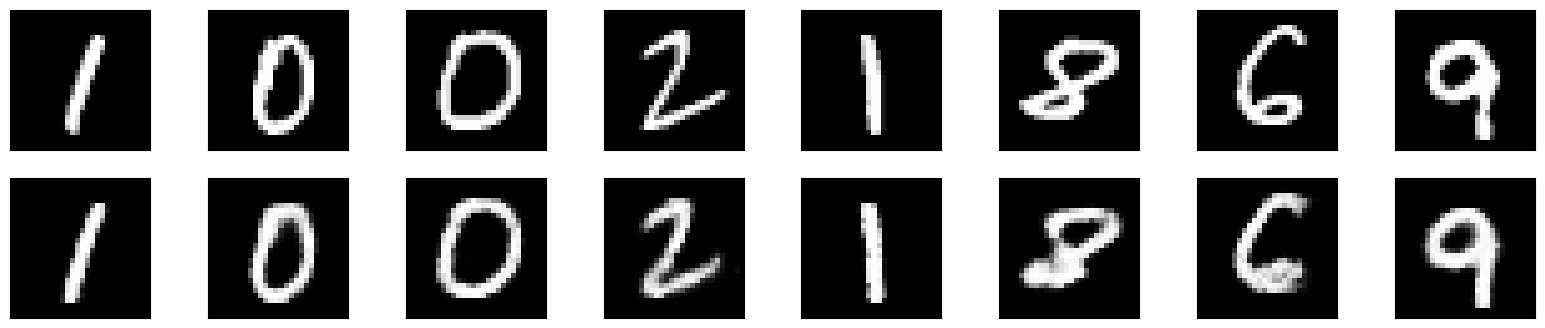

In [9]:
out = rbm.rbm_reconstruct(test_data)

# Plotting original and reconstructed images
row, col = 2, 8
idx = np.random.randint(0, 100, row * col // 2)
f, axarr = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20,4))
for fig, row in zip([test_data,out], axarr):
    for i,ax in zip(idx,row):
        ax.imshow(tf.reshape(fig[i],[28, 28]), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)